In [4]:
import yfinance as yf
import talib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')
sns.set()

tickers = ['AAPL', 'MSFT']
start_date = '2018-01-01'
end_date = '2024-12-31'
data_dict = {}

for ticker in tickers:
    df = yf.download(ticker, start=start_date, end=end_date, auto_adjust=False)
    
    if df.empty or not all(col in df.columns for col in ['Close', 'High', 'Low', 'Volume']):
        print(f"Skipping {ticker}")
        continue

    close = df['Close'].squeeze().values.astype('float64')
    high = df['High'].squeeze().values.astype('float64')
    low = df['Low'].squeeze().values.astype('float64')
    volume = df['Volume'].squeeze().values.astype('float64')

    df['RSI'] = talib.RSI(close, timeperiod=14)
    df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(close)
    df['BB_upper'], df['BB_middle'], df['BB_lower'] = talib.BBANDS(close)
    df['ADX'] = talib.ADX(high, low, close)
    df['OBV'] = talib.OBV(close, volume)

    df['Close_diff'] = df['Close'].diff()
    df.dropna(inplace=True)

    scaler = MinMaxScaler()
    df[['Close_norm', 'RSI_norm', 'MACD_norm']] = scaler.fit_transform(df[['Close', 'RSI', 'MACD']])

    total_len = len(df)
    train_end = int(total_len * 0.7)
    val_end = int(total_len * 0.85)

    df['split'] = 'test'
    df.iloc[:train_end, df.columns.get_loc('split')] = 'train'
    df.iloc[train_end:val_end, df.columns.get_loc('split')] = 'val'

    data_dict[ticker] = df


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


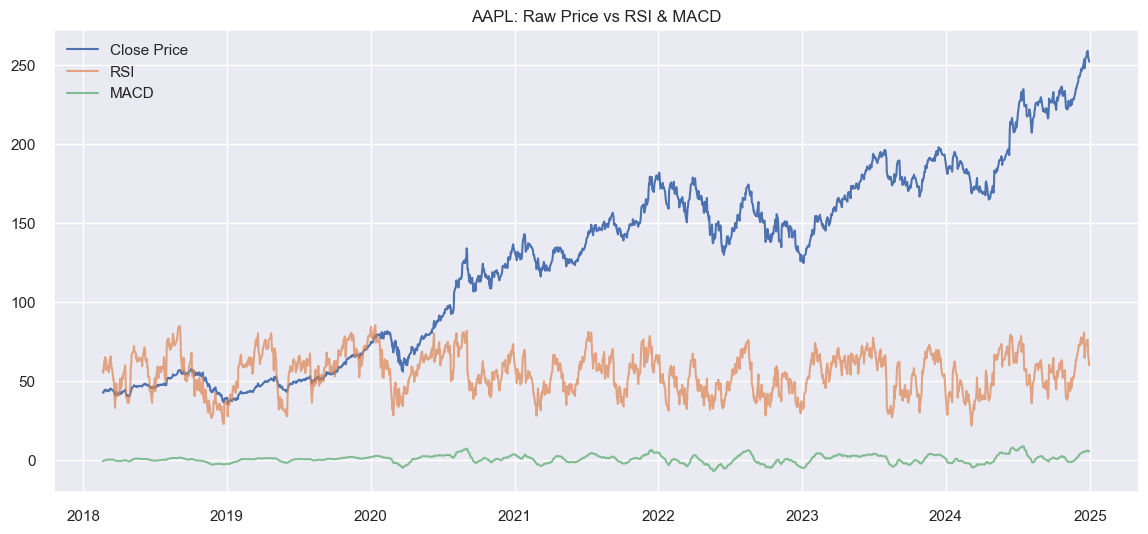

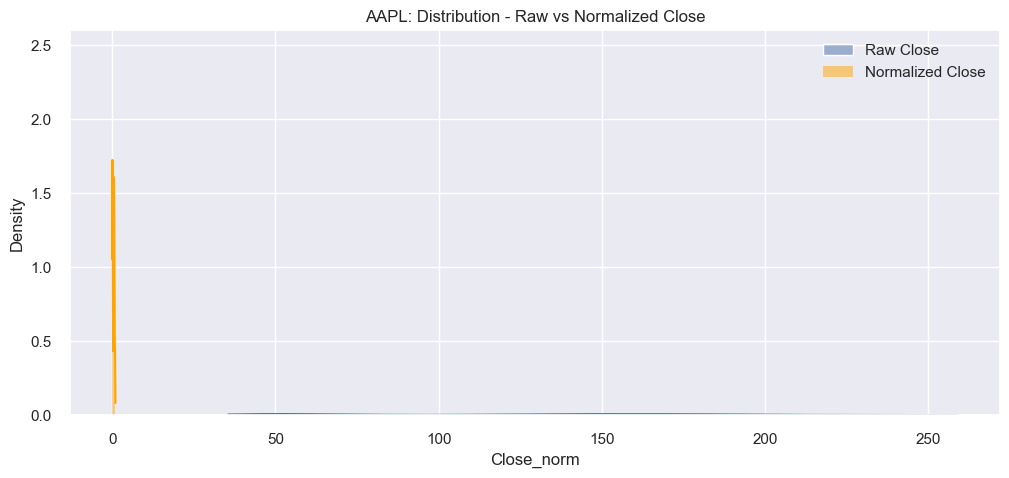

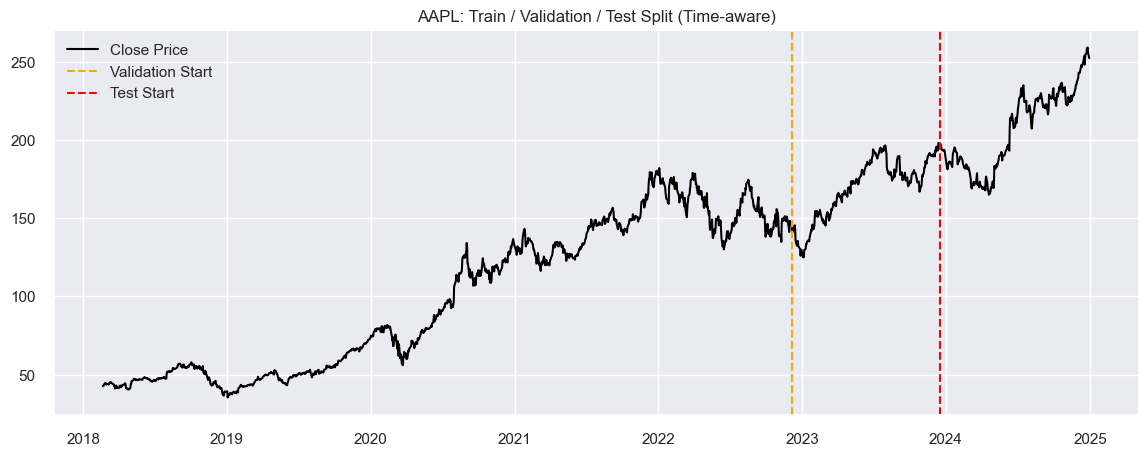

In [5]:
ticker = 'AAPL'
if ticker in data_dict:
    df = data_dict[ticker]

    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df['Close'], label='Close Price')
    plt.plot(df.index, df['RSI'], label='RSI', alpha=0.7)
    plt.plot(df.index, df['MACD'], label='MACD', alpha=0.7)
    plt.title(f"{ticker}: Raw Price vs RSI & MACD")
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12, 5))
    sns.histplot(df['Close'], kde=True, label='Raw Close', color='blue', stat='density')
    sns.histplot(df['Close_norm'], kde=True, label='Normalized Close', color='orange', stat='density')
    plt.title(f"{ticker}: Distribution - Raw vs Normalized Close")
    plt.legend()
    plt.show()

    plt.figure(figsize=(14, 5))
    plt.plot(df.index, df['Close'], label='Close Price', color='black')
    plt.axvline(df[df['split'] == 'val'].index[0], color='orange', linestyle='--', label='Validation Start')
    plt.axvline(df[df['split'] == 'test'].index[0], color='red', linestyle='--', label='Test Start')
    plt.title(f"{ticker}: Train / Validation / Test Split (Time-aware)")
    plt.legend()
    plt.grid(True)
    plt.show()


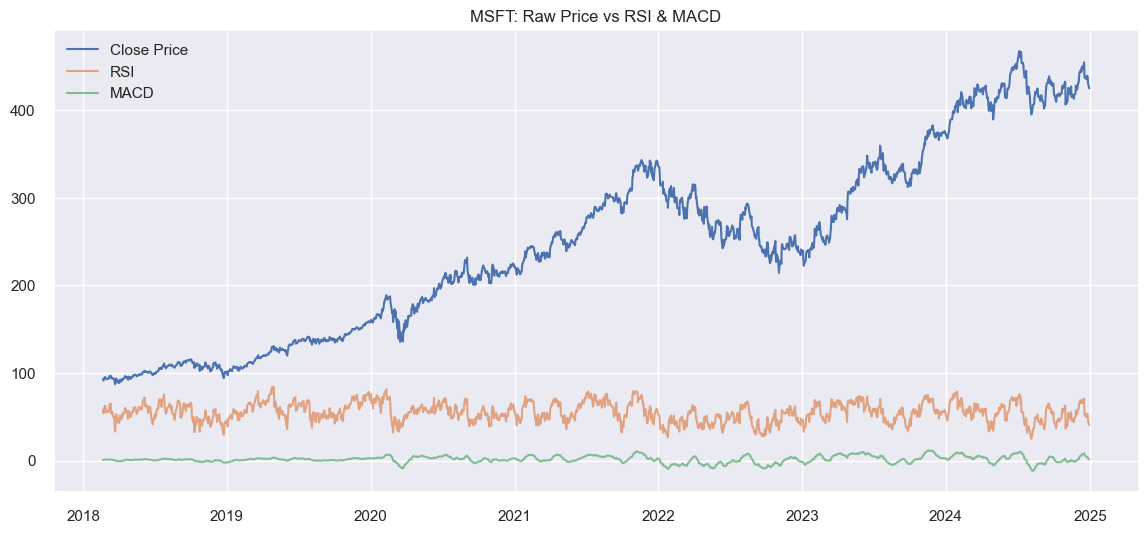

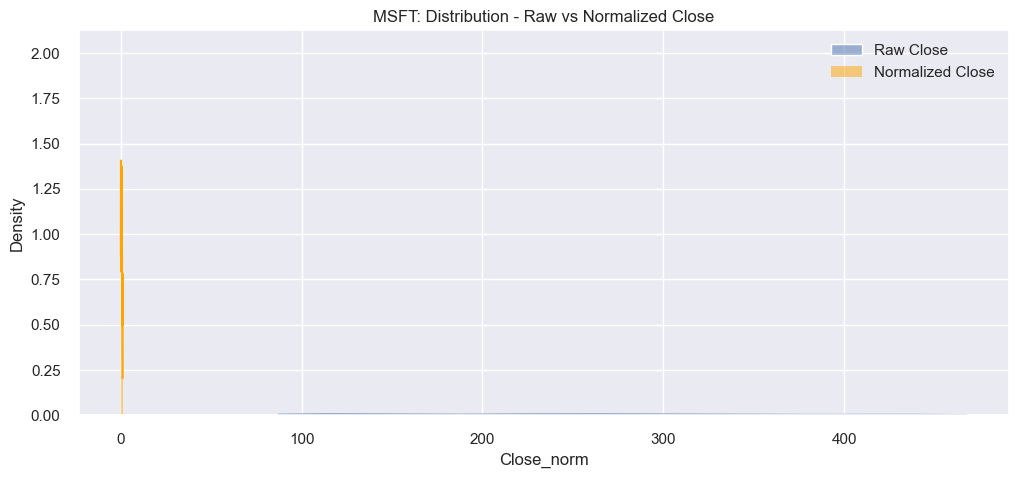

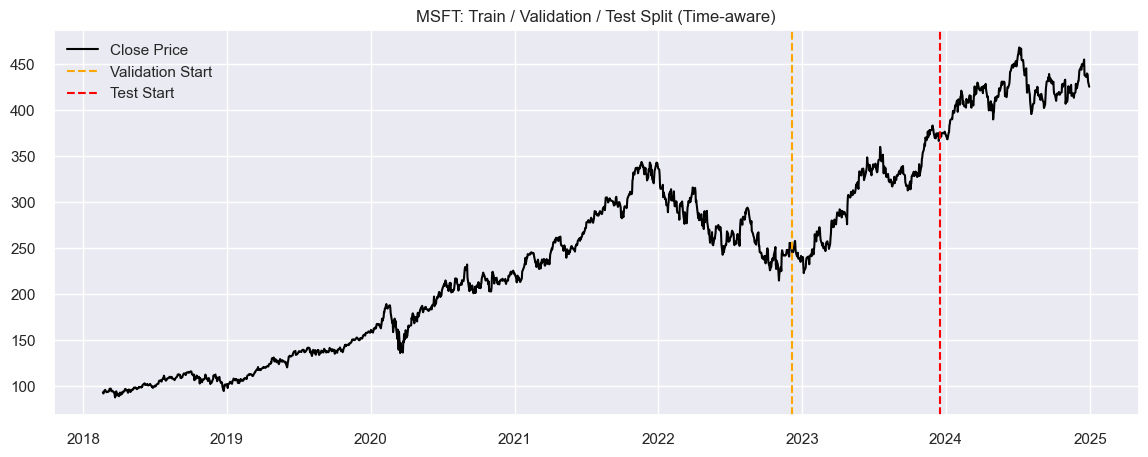

In [6]:
ticker = 'MSFT'
if ticker in data_dict:
    df = data_dict[ticker]

    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df['Close'], label='Close Price')
    plt.plot(df.index, df['RSI'], label='RSI', alpha=0.7)
    plt.plot(df.index, df['MACD'], label='MACD', alpha=0.7)
    plt.title(f"{ticker}: Raw Price vs RSI & MACD")
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12, 5))
    sns.histplot(df['Close'], kde=True, label='Raw Close', color='blue', stat='density')
    sns.histplot(df['Close_norm'], kde=True, label='Normalized Close', color='orange', stat='density')
    plt.title(f"{ticker}: Distribution - Raw vs Normalized Close")
    plt.legend()
    plt.show()

    plt.figure(figsize=(14, 5))
    plt.plot(df.index, df['Close'], label='Close Price', color='black')
    plt.axvline(df[df['split'] == 'val'].index[0], color='orange', linestyle='--', label='Validation Start')
    plt.axvline(df[df['split'] == 'test'].index[0], color='red', linestyle='--', label='Test Start')
    plt.title(f"{ticker}: Train / Validation / Test Split (Time-aware)")
    plt.legend()
    plt.grid(True)
    plt.show()
